In [1]:
import numpy as np 
import pandas as pd 
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("C:\\Users\\Anjali Kumari\\Downloads\\archive (2)\\car_data.csv")

In [3]:
df1.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [5]:
df1.columns

Index(['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement',
       'drive', 'fuel_type', 'highway_mpg', 'make', 'model', 'transmission',
       'year'],
      dtype='object')

In [6]:
df1.dtypes

city_mpg             int64
class               object
combination_mpg      int64
cylinders          float64
displacement       float64
drive               object
fuel_type           object
highway_mpg          int64
make                object
model               object
transmission        object
year                 int64
dtype: object

In [7]:
df1.tail

<bound method NDFrame.tail of      city_mpg                        class  combination_mpg  cylinders  \
0          25                  midsize car               29        4.0   
1          26                  midsize car               30        4.0   
2          25  small sport utility vehicle               27        4.0   
3          26  small sport utility vehicle               29        4.0   
4          26  small sport utility vehicle               28        4.0   
..        ...                          ...              ...        ...   
545        23                  compact car               27        4.0   
546        21                  midsize car               24        6.0   
547        21                  midsize car               24        6.0   
548        17                  midsize car               19        8.0   
549        17                  midsize car               19        8.0   

     displacement drive fuel_type  highway_mpg   make  \
0             2.5   fwd 

In [8]:
df1.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


In [9]:
df1.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df1[['cylinders', 'displacement']] = imputer.fit_transform(df1[['cylinders', 'displacement']])

In [11]:
df1.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [12]:
df1_encoded = pd.get_dummies(df1, drop_first=True)

In [13]:
correlation_matrix_encoded = df1_encoded.corr()
correlation_matrix_encoded

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year,class_large car,class_midsize car,class_midsize station wagon,class_minicompact car,...,model_xj,model_xjl,model_xt5,model_xt5 awd,model_yukon c1500 2wd,model_yukon c1500 xl 2wd,model_yukon k1500 4wd,model_yukon k1500 xl 4wd,model_z4 sdrive28i,transmission_m
city_mpg,1.000000,0.991671,-0.472787,-0.482001,0.944696,0.100795,-0.077899,0.051941,-0.014546,0.079655,...,-0.033871,-0.033871,-0.012898,-0.018141,-0.044233,-0.044233,-0.047944,-0.051655,0.002831,0.026095
combination_mpg,0.991671,1.000000,-0.527739,-0.537082,0.974735,0.105272,-0.079931,0.072849,-0.012687,0.099745,...,-0.034668,-0.034668,-0.011819,-0.017531,-0.053115,-0.053115,-0.057158,-0.057158,0.011030,0.057285
cylinders,-0.472787,-0.527739,1.000000,0.940534,-0.551933,-0.203614,0.142488,-0.044694,-0.010866,-0.111514,...,0.065271,0.065271,0.016639,0.016639,0.092392,0.092392,0.092392,0.092392,-0.031992,-0.156855
displacement,-0.482001,-0.537082,0.940534,1.000000,-0.560472,-0.239384,0.141191,-0.037527,-0.020950,-0.123963,...,0.070900,0.070900,0.022908,0.022908,0.136751,0.136751,0.136751,0.136751,-0.031940,-0.144566
highway_mpg,0.944696,0.974735,-0.551933,-0.560472,1.000000,0.118513,-0.071745,0.112576,-0.018666,0.142064,...,-0.035070,-0.035070,-0.010061,-0.016313,-0.058492,-0.058492,-0.062918,-0.067343,0.021201,0.117156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
model_yukon c1500 xl 2wd,-0.044233,-0.053115,0.092392,0.136751,-0.058492,-0.076416,-0.009400,-0.019728,-0.003650,-0.012037,...,-0.002578,-0.002578,-0.002578,-0.002578,-0.003650,1.000000,-0.003650,-0.003650,-0.002578,-0.025469
model_yukon k1500 4wd,-0.047944,-0.057158,0.092392,0.136751,-0.062918,-0.076416,-0.009400,-0.019728,-0.003650,-0.012037,...,-0.002578,-0.002578,-0.002578,-0.002578,-0.003650,-0.003650,1.000000,-0.003650,-0.002578,-0.025469
model_yukon k1500 xl 4wd,-0.051655,-0.057158,0.092392,0.136751,-0.067343,-0.076416,-0.009400,-0.019728,-0.003650,-0.012037,...,-0.002578,-0.002578,-0.002578,-0.002578,-0.003650,-0.003650,-0.003650,1.000000,-0.002578,-0.025469
model_z4 sdrive28i,0.002831,0.011030,-0.031992,-0.031940,0.021201,-0.040489,-0.006640,-0.013937,-0.002578,-0.008503,...,-0.001821,-0.001821,-0.001821,-0.001821,-0.002578,-0.002578,-0.002578,-0.002578,1.000000,-0.017993


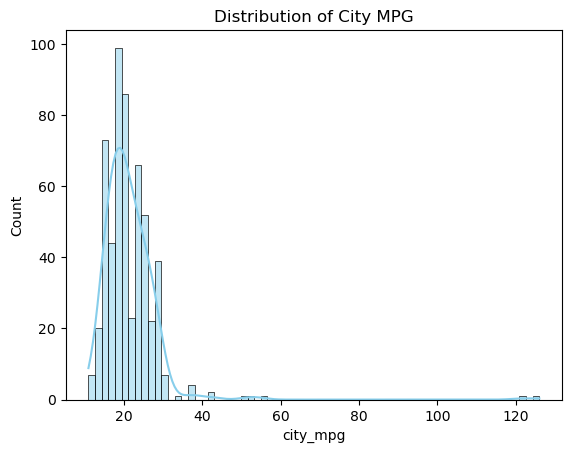

In [14]:
sns.histplot(df1['city_mpg'], kde=True,color='skyblue')
plt.title('Distribution of City MPG')
plt.show()

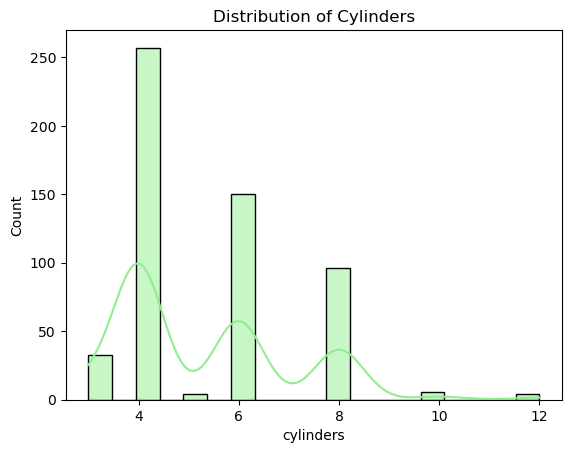

In [15]:
sns.histplot(df1['cylinders'], kde=True, color='lightgreen')
plt.title('Distribution of Cylinders')
plt.show()

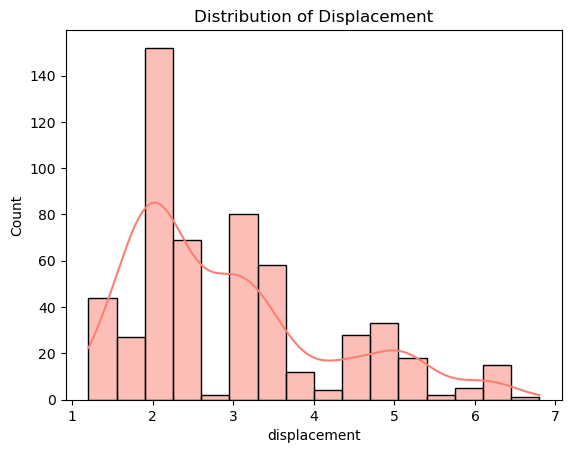

In [16]:
sns.histplot(df1['displacement'], kde=True, color='salmon')
plt.title('Distribution of Displacement')
plt.show()

In [17]:
X = df1_encoded.drop('city_mpg', axis=1)
y = df1_encoded['city_mpg']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score 
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy*100:.2f}")

Random Forest Accuracy: 56.36


In [22]:
X = df1_encoded.drop('city_mpg', axis=1)
y = df1_encoded['city_mpg']

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [25]:
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy_gb*100:.2f}')

Accuracy: 60.91


In [30]:
pip install catboost

     -------------------------------------- 101.8/101.8 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
cat_model = CatBoostClassifier(random_seed=42, verbose=0)
cat_model.fit(X_train, y_train)

cat_predictions = cat_model.predict(X_test)

In [32]:
y_pred_cat = cat_model.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f'Accuracy: {accuracy_cat*100:.2f}')

Accuracy: 58.18


In [33]:
df1.describe(include = "object")

,class,drive,fuel_type,make,model,transmission
count,550,550,550,550,550,550
unique,13,4,3,31,276,2
top,small sport utility vehicle,awd,gas,bmw,veloster,a
freq,157,215,546,72,12,467


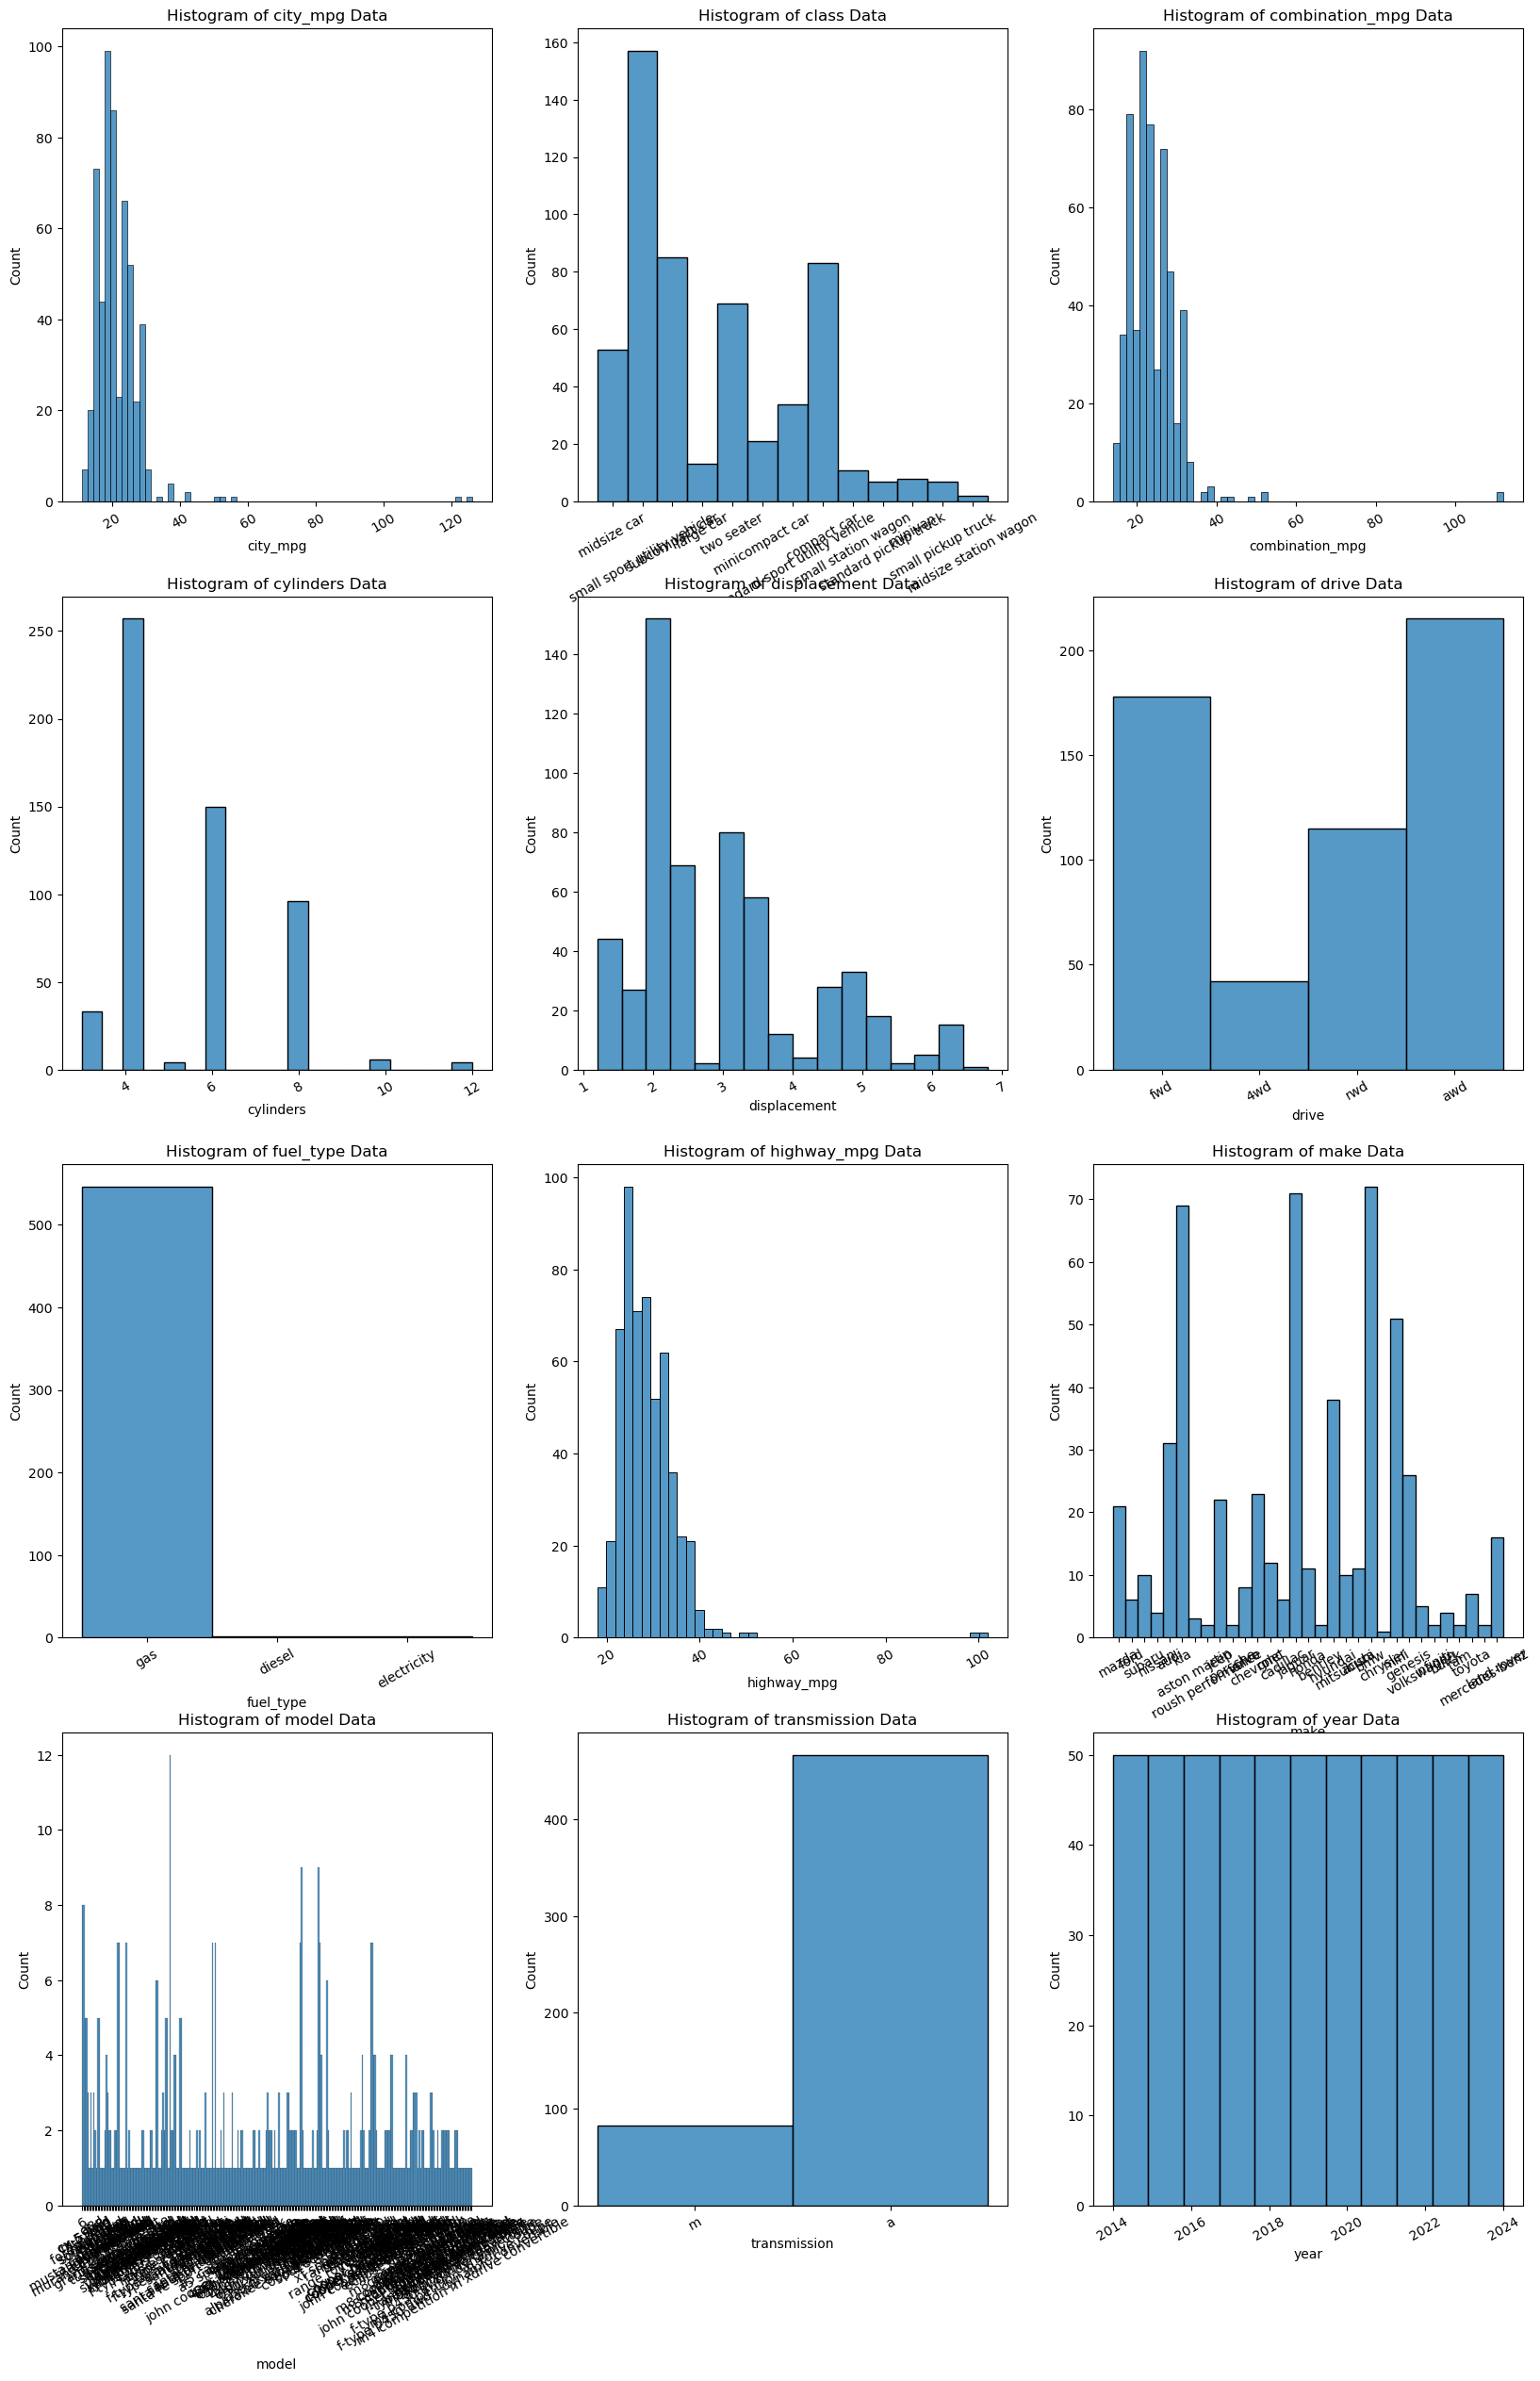

In [36]:
plt.figure(figsize = (20, 30))
for i, col in enumerate(df1.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(x = df1[col])
    plt.title(f"Histogram of {col} Data")
    plt.xticks(rotation = 30)
    plt.plot()

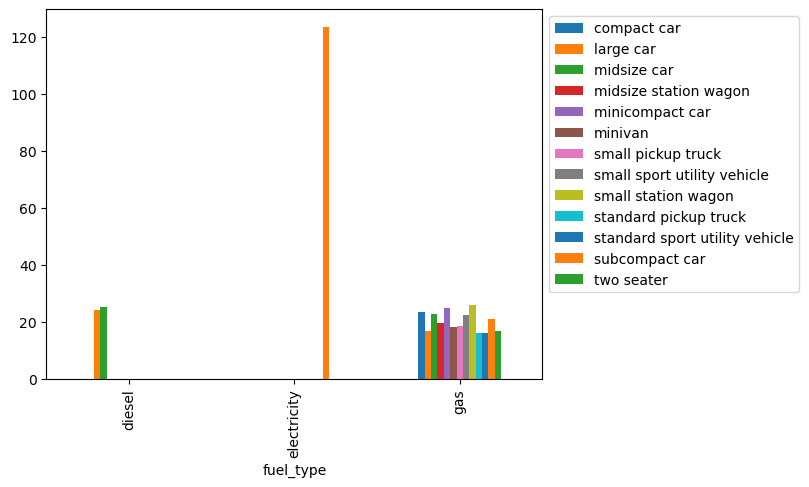

In [38]:
ax1 = df1.pivot_table(index = "fuel_type", columns = "class", values = "city_mpg", aggfunc = "mean").plot.bar()
ax1.legend(loc = "best", bbox_to_anchor = (1, 1))
plt.show()

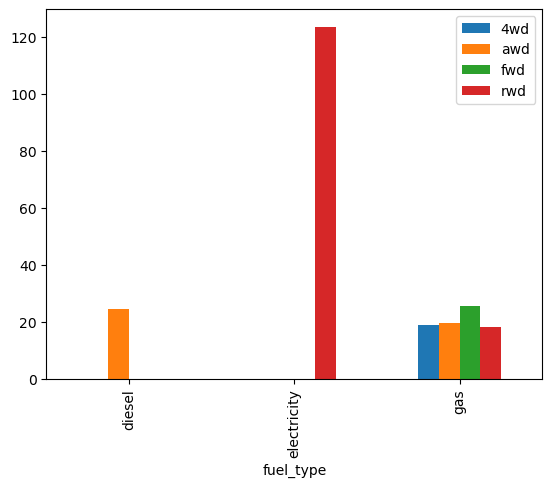

In [40]:
ax2 = df1.pivot_table(index = "fuel_type", columns = "drive", values = "city_mpg", aggfunc = "mean").plot.bar()
ax2.legend(loc = "best", bbox_to_anchor = (1, 1))
plt.show()

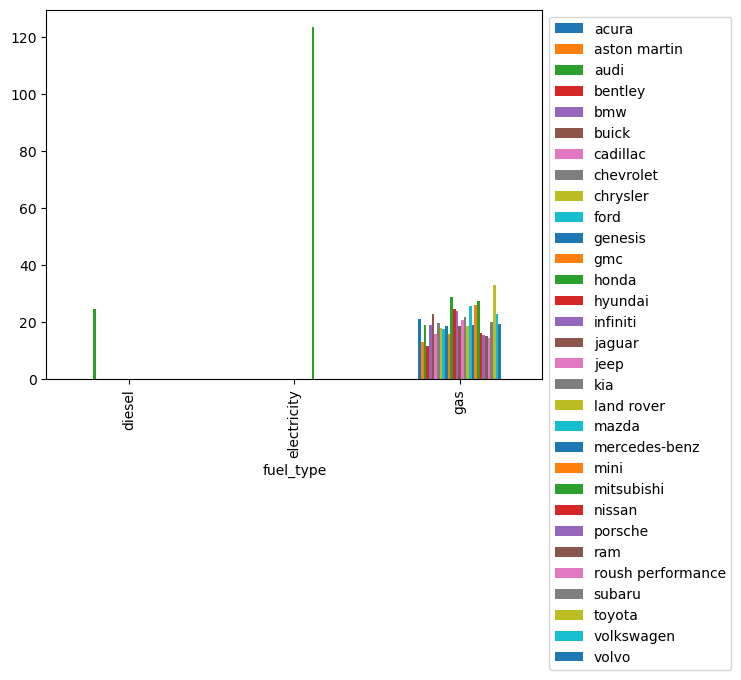

In [41]:
ax3 = df1.pivot_table(index = "fuel_type", columns = "make", values = "city_mpg", aggfunc = "mean").plot.bar()
ax3.legend(loc = "best", bbox_to_anchor = (1, 1))
plt.show()

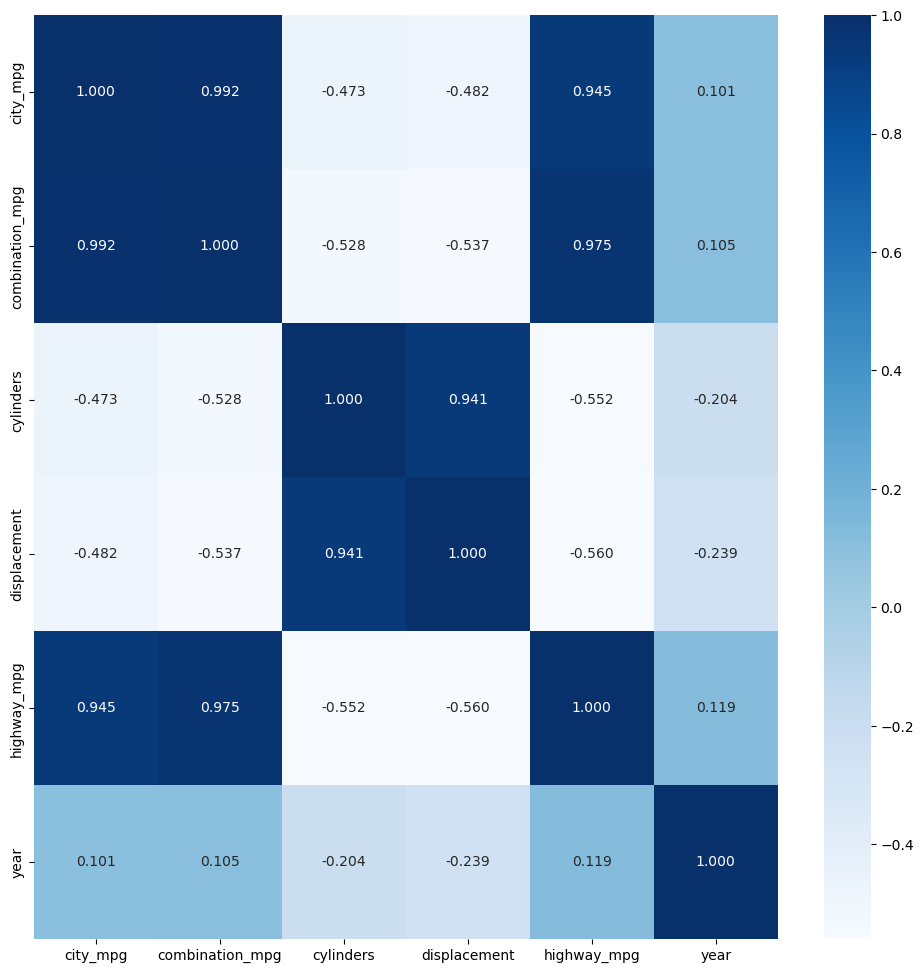

In [42]:
df1_corr = df1.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(df1_corr, fmt = ".3f", annot = True, cmap = "Blues")
plt.show()

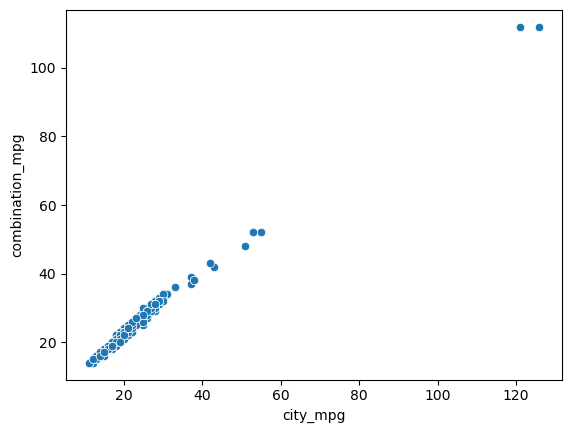

In [43]:
sns.scatterplot(x = df1["city_mpg"], y = df1["combination_mpg"])
plt.show()

In [46]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

sc = StandardScaler()

X_train_encoded[numerical_columns] = sc.fit_transform(X_train_encoded[numerical_columns])
X_test_encoded[numerical_columns] = sc.transform(X_test_encoded[numerical_columns])

print(X_train_encoded.head())

     city_mpg  combination_mpg  cylinders  displacement  highway_mpg  \
482  0.612856         0.849738  -1.346146     -1.150531     1.142986   
158 -0.419872        -0.409133   0.406871      0.322117    -0.530140   
15  -0.649367        -0.660908   1.575549      1.712951    -0.530140   
334 -0.075629        -0.157359  -0.761807     -0.741463    -0.251286   
39  -0.075629        -0.031472  -0.761807     -0.741463    -0.111859   

     class_large car  class_midsize car  class_midsize station wagon  \
482                0                  0                            0   
158                0                  0                            0   
15                 0                  0                            0   
334                0                  0                            0   
39                 0                  0                            0   

     class_minicompact car  class_minivan  ...  model_xf 30t  model_xf awd  \
482                      1              0  ...          

In [50]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


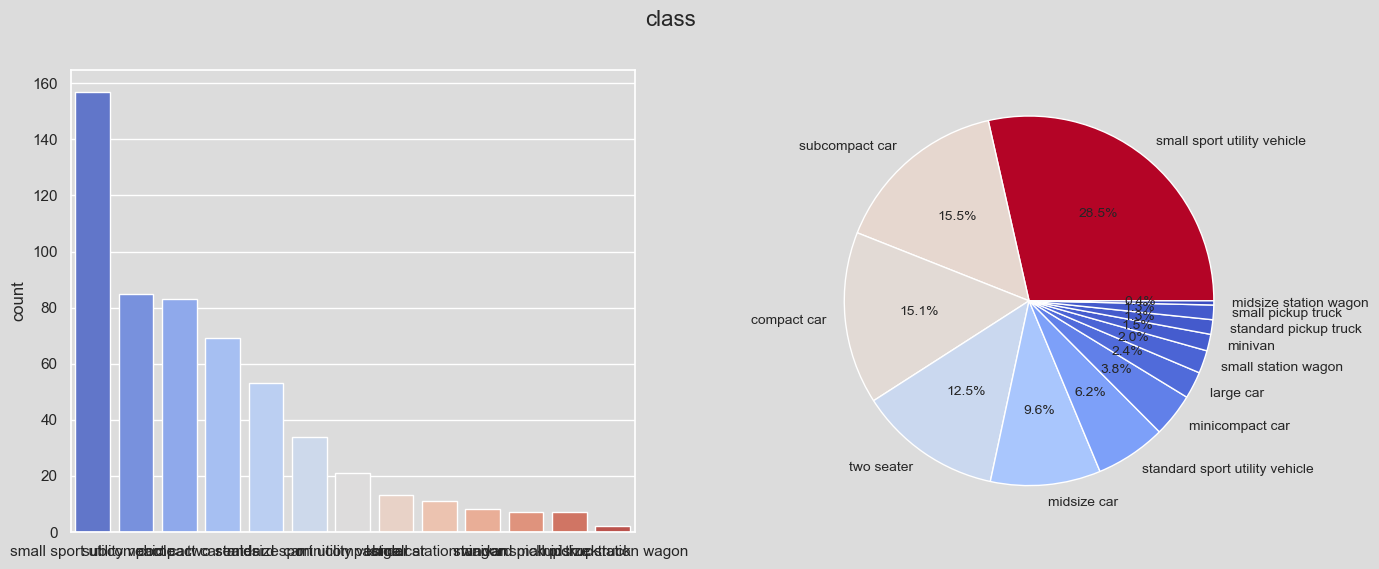

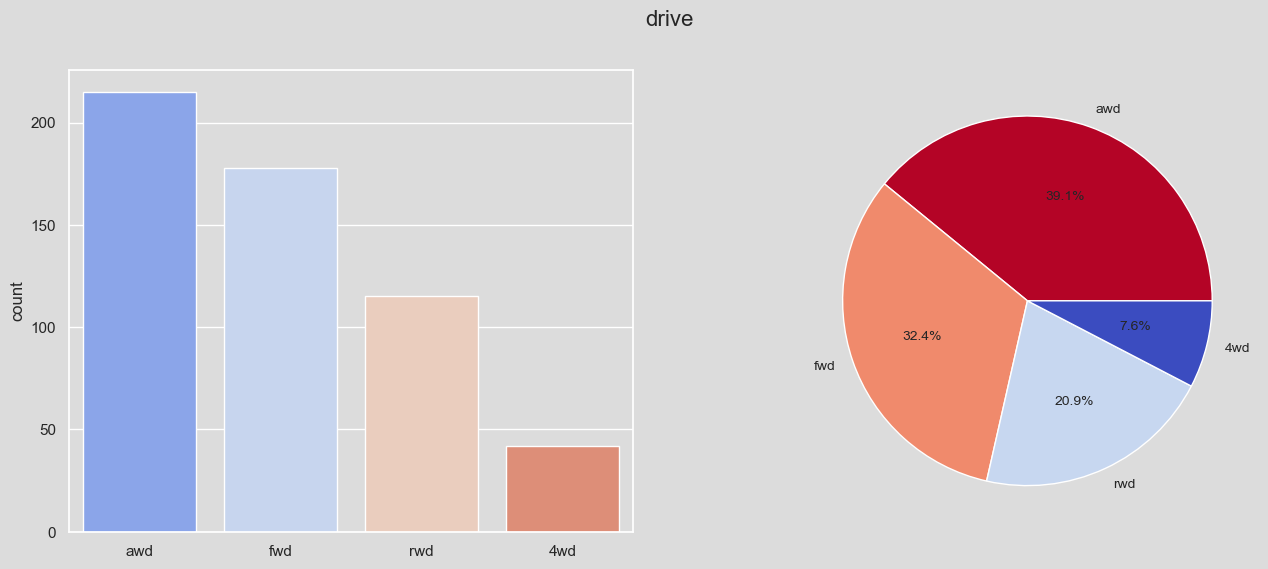

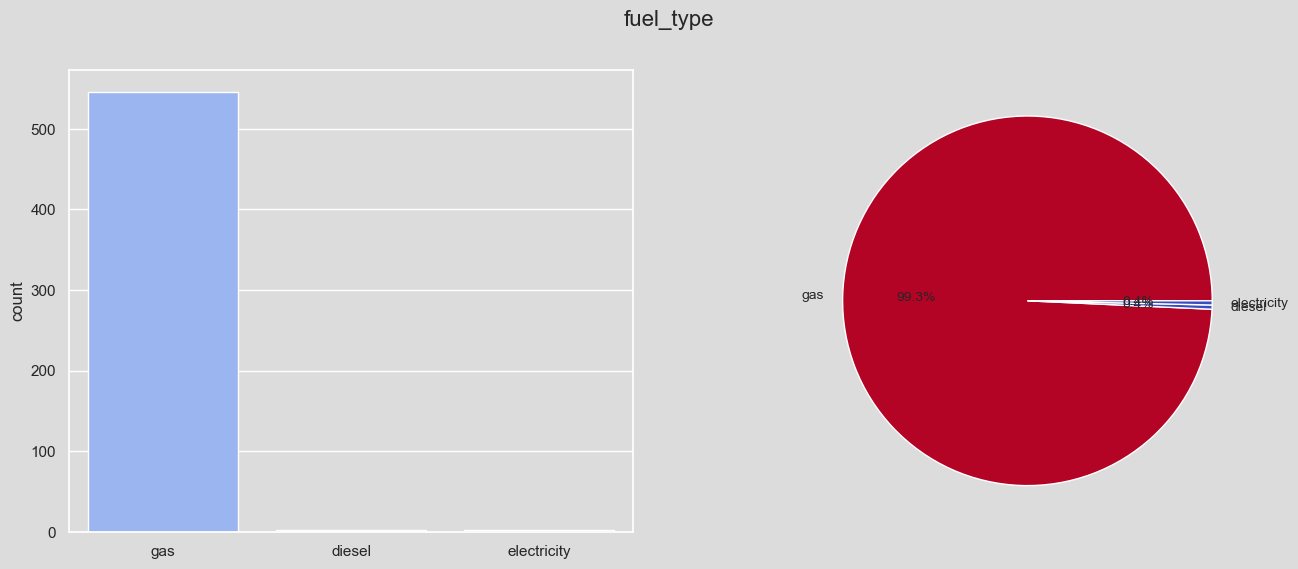

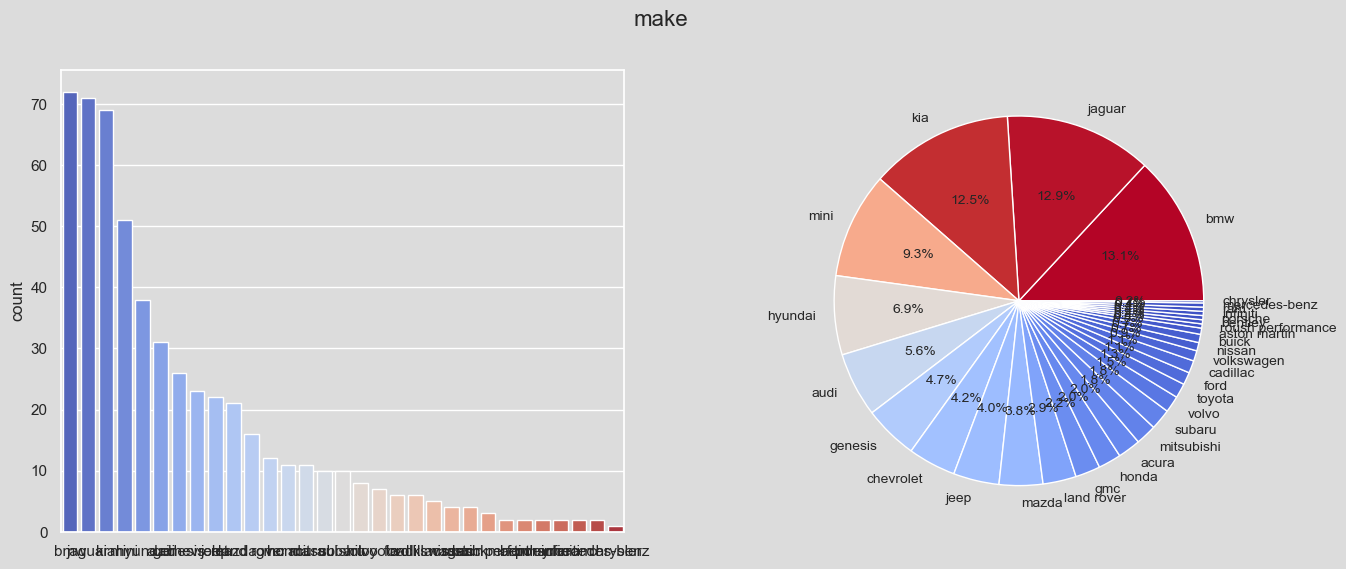

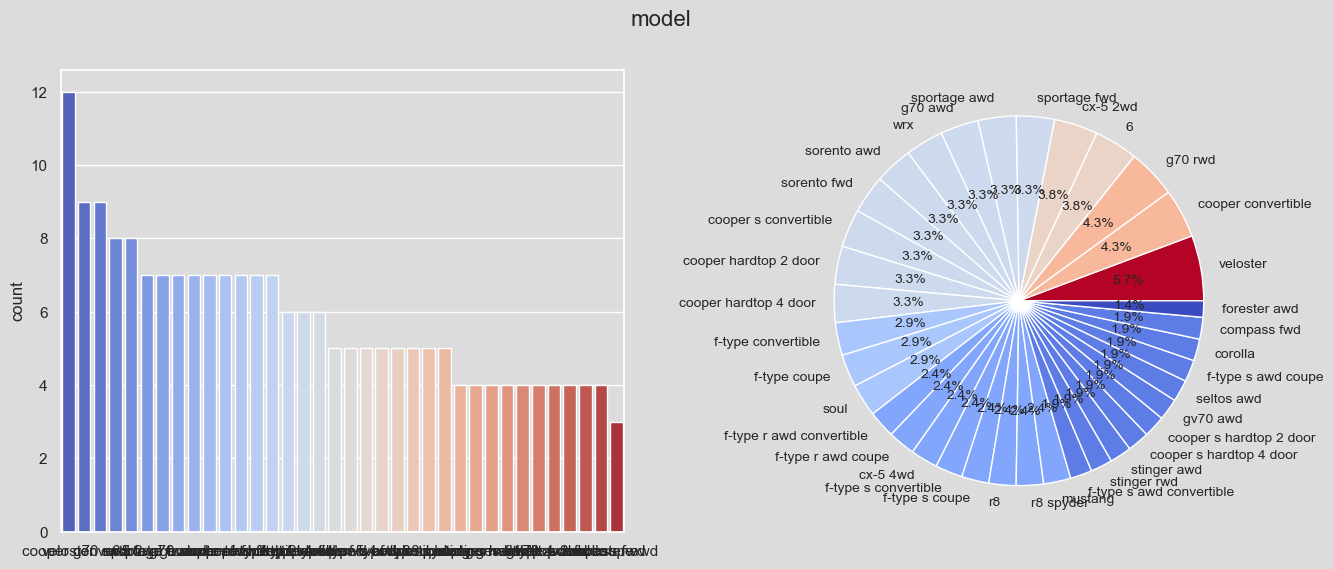

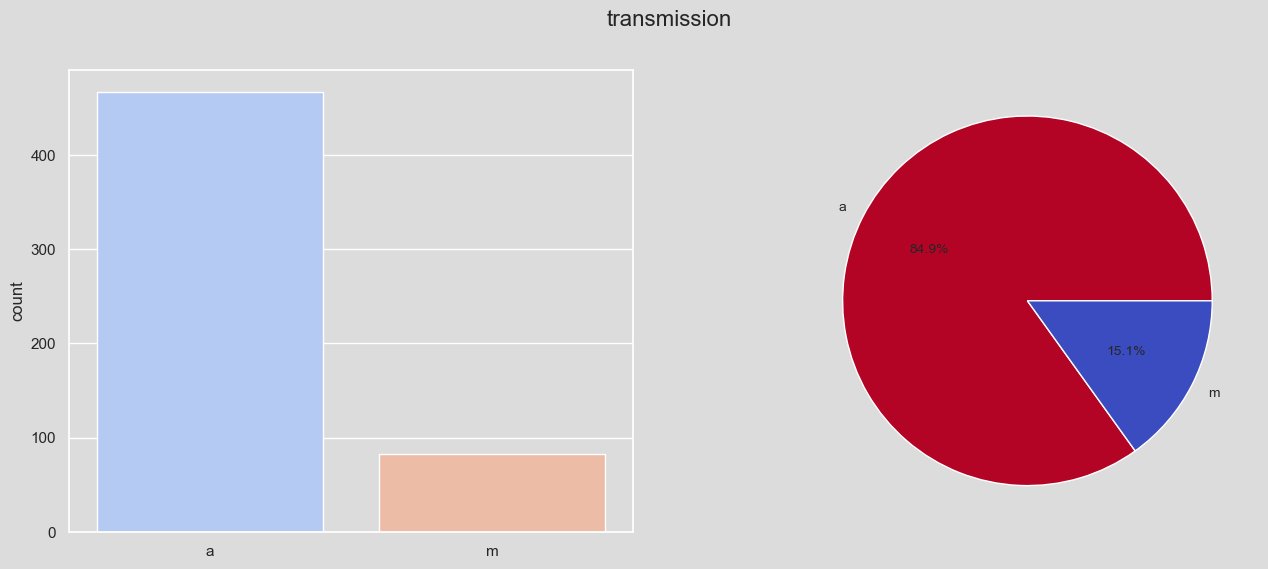

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def cat_analyser(data, col: str, freq_limit: int = 36):
    df1_ = data.copy()
    sns.set(rc={'axes.facecolor': 'gainsboro', 'figure.facecolor': 'gainsboro'})
    
    # Limit the number of unique categories if it exceeds the freq_limit
    if df1_[col].nunique() > freq_limit:
        df1_ = df1_.loc[df1_[col].isin(df1_[col].value_counts().keys()[:freq_limit].tolist())]
    
    # Create subplots for countplot and pie chart
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    fig.suptitle(col, fontsize=16)
    
    # Countplot
    sns.countplot(data=df1_, x=col, ax=ax[0], palette='coolwarm', 
                  order=df1_[col].value_counts().index)
    ax[0].set_xlabel('')

    # Pie chart
    pie_cmap = plt.get_cmap('coolwarm')
    normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
    df1_[col].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 10},
                                      ax=ax[1], colors=pie_cmap(normalize(df1_[col].value_counts())))
    ax[1].set_ylabel('')
    
    plt.show()
    matplotlib.rc_file_defaults()  
    sns.reset_orig()  
cat_cols = df1.select_dtypes(include=['object', 'category']).columns.tolist()

# Analyze each categorical column
for col in cat_cols:
    cat_analyser(df1, col)
